In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [12]:
import torch
import torch.nn as nn
import torchvision
from torchvision import models,transforms
from torch.utils.data import DataLoader,Dataset
from torchvision.datasets import ImageFolder
import matplotlib.pyplot as plt
import cv2
from PIL import Image
import os

Text(0.5, 1.0, 'Negative')

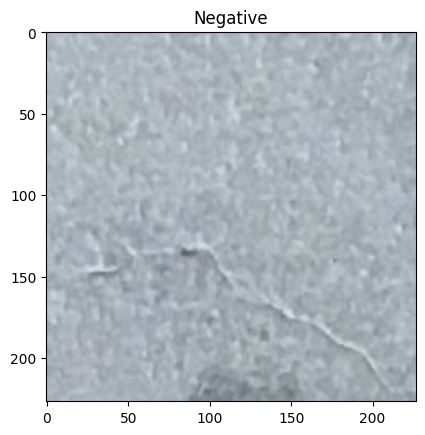

In [10]:
#display a positive and a negative image
image = cv2.imread('/kaggle/input/surface-crack-detection/Negative/00005.jpg')
plt.imshow(image)
plt.title('Negative')

Text(0.5, 1.0, 'Positive')

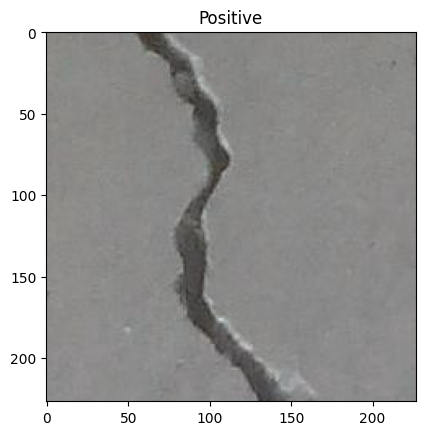

In [11]:
image = cv2.imread('/kaggle/input/surface-crack-detection/Positive/00003.jpg')
plt.imshow(image)
plt.title('Positive')

In [14]:
len(os.listdir('/kaggle/input/surface-crack-detection/Negative'))

20000

In [15]:
os.chdir('/kaggle/working/')

In [16]:
os.mkdir('train')

In [17]:
os.mkdir('test')

In [ ]:
os.chdir('train')